# Exploratory Analysis

In [5]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [20]:
# import a dataset
df = pd.read_excel("./datasets/AdventureWorks.xlsx")
colum_names = {
    "Data Venda": "SALE_DATE",
    "Data Envio": "SHIP_DATE",
    "ID Loja": "STORE_ID",
    "ID Produto": "PRODUCT_ID",
    "ID Cliente": "CLIENT_ID",
    "No. Venda": "SALE_NUM",
    "Custo Unitário": "UNIT_COST",
    "Preço Unitário": "UNIT_PRICE",
    "Quantidade": "QUANTITY",
    "Valor Desconto": "DESCOUNT_VALUE",
    "Valor Venda": "INCOME",
    "Produto": "PRODUCT",
    "Fabricante": "MANUFACTURER",
    "Marca": "BRAND",
    "Classe": "CLASS",
    "Cor": "COLOR",
}
df = df.rename(columns=colum_names)
df.head()

,SALE_DATE,SHIP_DATE,STORE_ID,PRODUCT_ID,CLIENT_ID,SALE_NUM,UNIT_COST,UNIT_PRICE,QUANTITY,DESCOUNT_VALUE,INCOME,PRODUCT,MANUFACTURER,BRAND,CLASS,COLOR
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [21]:
# get datashape size
df.shape

(904, 16)

In [22]:
# get dataframe data types
df.dtypes

SALE_DATE         datetime64[ns]
SHIP_DATE         datetime64[ns]
STORE_ID                   int64
PRODUCT_ID                 int64
CLIENT_ID                  int64
SALE_NUM                  object
UNIT_COST                float64
UNIT_PRICE               float64
QUANTITY                   int64
DESCOUNT_VALUE           float64
INCOME                   float64
PRODUCT                   object
MANUFACTURER              object
BRAND                     object
CLASS                     object
COLOR                     object
dtype: object

In [36]:
# What is the total income?
print(f"The total income is {df.INCOME.sum():,.2f}")

The total income is 5,984,606.14


In [34]:
# What is the total cost?
df["COST"] = df["UNIT_COST"].mul(df["QUANTITY"])
print(f"The total cost is {df.COST.sum():,.2f}")

The total cost is 2,486,783.05


In [38]:
# What is the total profit?
df["PROFIT"] = df["INCOME"] - df.COST
print(f"The total profit is {df.PROFIT.sum():,.2f}")

The total profit is 3,497,823.09


In [46]:
# How long does it take from sale date to ship date by brand?
df["PRODUCT_LEAD_TIME"] = (df["SHIP_DATE"] - df["SALE_DATE"]).dt.days
df.groupby(df.BRAND)["PRODUCT_LEAD_TIME"].mean()

BRAND
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: PRODUCT_LEAD_TIME, dtype: float64

In [48]:
# Are there missing values?
df.isnull().sum()

SALE_DATE            0
SHIP_DATE            0
STORE_ID             0
PRODUCT_ID           0
CLIENT_ID            0
SALE_NUM             0
UNIT_COST            0
UNIT_PRICE           0
QUANTITY             0
DESCOUNT_VALUE       0
INCOME               0
PRODUCT              0
MANUFACTURER         0
BRAND                0
CLASS                0
COLOR                0
COST                 0
PROFIT               0
PRODUCT_LEAD_TIME    0
dtype: int64

In [56]:
# What is the prifit by year and brand?
pd.options.display.float_format = "{:20,.2f}".format
df.groupby([df.SALE_DATE.dt.year, "BRAND"])["PROFIT"].sum()

SALE_DATE  BRAND          
2008       Adventure Works             306,641.16
           Contoso                      56,416.00
           Fabrikam                  1,557,020.55
2009       Adventure Works             405,395.08
           Contoso                     138,258.95
           Fabrikam                  1,034,091.35
Name: PROFIT, dtype: float64

In [58]:
# Assign profit as a dataframe
profit_year_df = df.groupby([df.SALE_DATE.dt.year, "BRAND"])["PROFIT"].sum().reset_index()
profit_year_df

,SALE_DATE,BRAND,PROFIT
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [74]:
# What is the total of products sold?
total_products_sold = df.groupby("PRODUCT")["QUANTITY"].sum().sort_values(ascending=False)
total_products_sold

PRODUCT
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: QUANTITY, dtype: int64

Text(0, 0.5, 'Product')

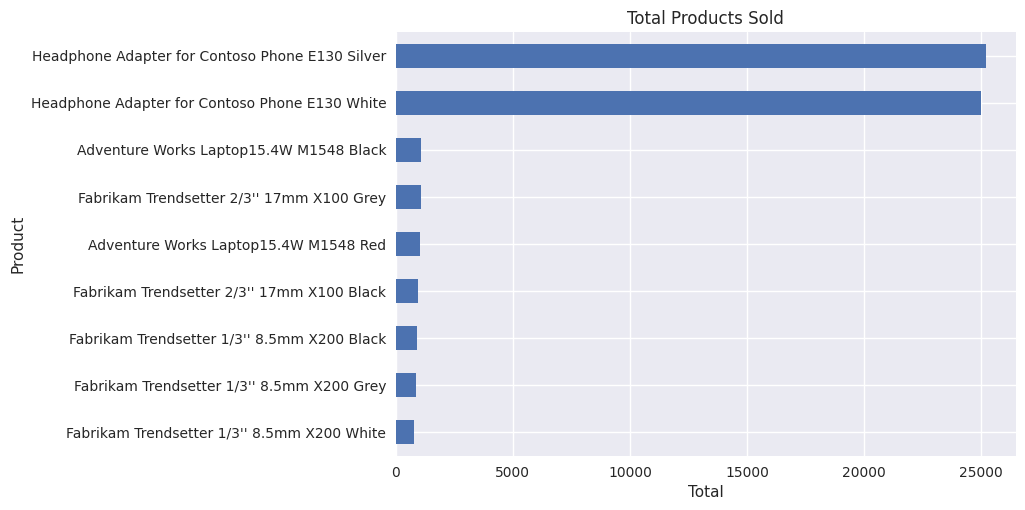

In [75]:
# Plot the total products sold
total_products_sold.sort_values(ascending=True).plot.barh(title="Total Products Sold")
plt.xlabel("Total")
plt.ylabel("Product")

SALE_DATE
2008           1,920,077.71
2009           1,577,745.38
Name: PROFIT, dtype: float64


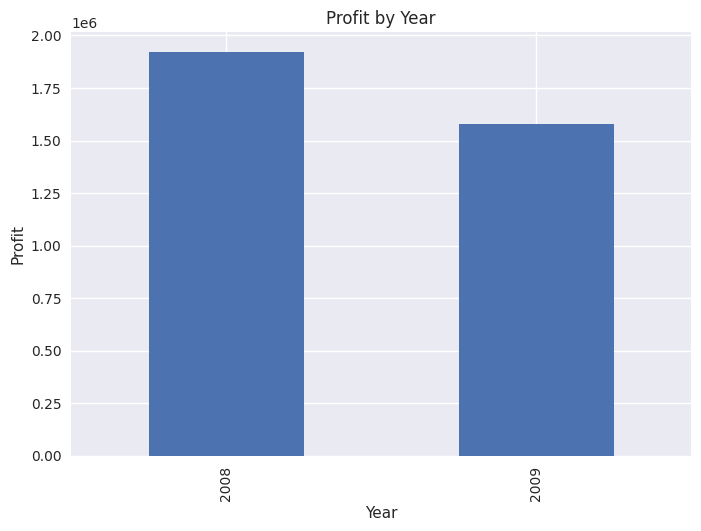

In [82]:
# Plot profit by year
profit_by_year = df.groupby(df["SALE_DATE"].dt.year)["PROFIT"].sum()
print(profit_by_year)
profit_by_year.plot.bar(title="Profit by Year")
plt.xlabel("Year")
plt.ylabel("Profit");

In [86]:
# What are the sales for 2009?
df_2009 = df[df.SALE_DATE.dt.year == 2009]
df_2009.head()

,SALE_DATE,SHIP_DATE,STORE_ID,PRODUCT_ID,CLIENT_ID,SALE_NUM,UNIT_COST,UNIT_PRICE,QUANTITY,DESCOUNT_VALUE,INCOME,PRODUCT,MANUFACTURER,BRAND,CLASS,COLOR,COST,PROFIT,PRODUCT_LEAD_TIME
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


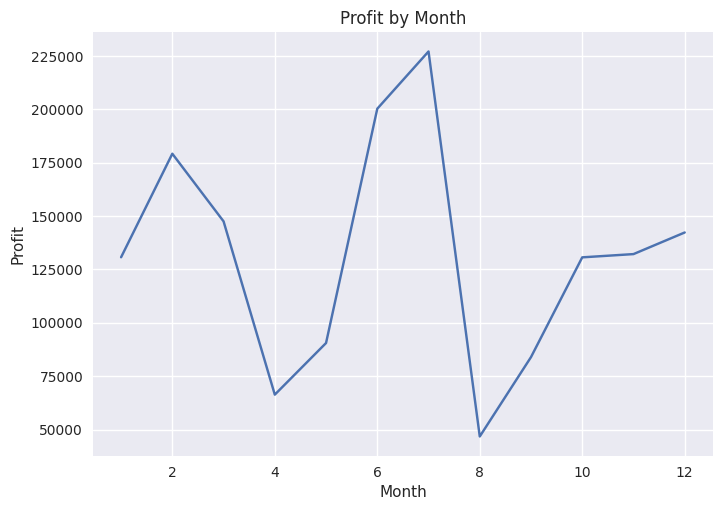

In [93]:
# What is the profit for each month of 2009?
df_2009.groupby(df.SALE_DATE.dt.month)["PROFIT"].sum().plot(title="Profit by Month")
plt.xlabel("Month")
plt.ylabel("Profit");

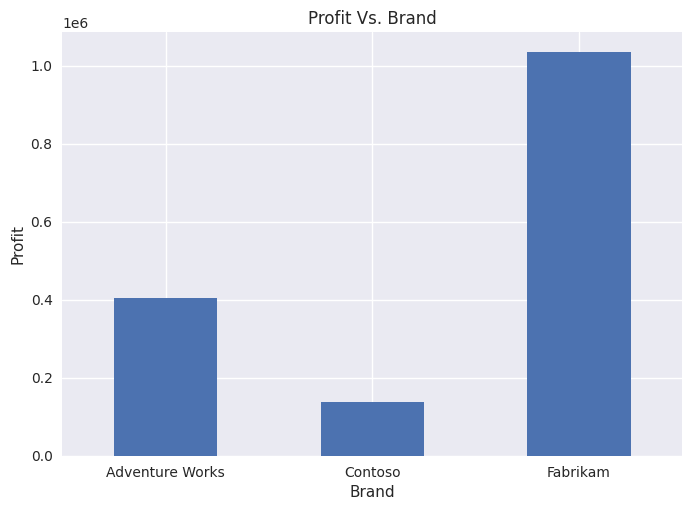

In [95]:
# What is the profit for each brand in 2009?
df_2009.groupby("BRAND")["PROFIT"].sum().plot.bar(title="Profit Vs. Brand")
plt.xlabel("Brand")
plt.ylabel("Profit")
plt.xticks(rotation="horizontal");

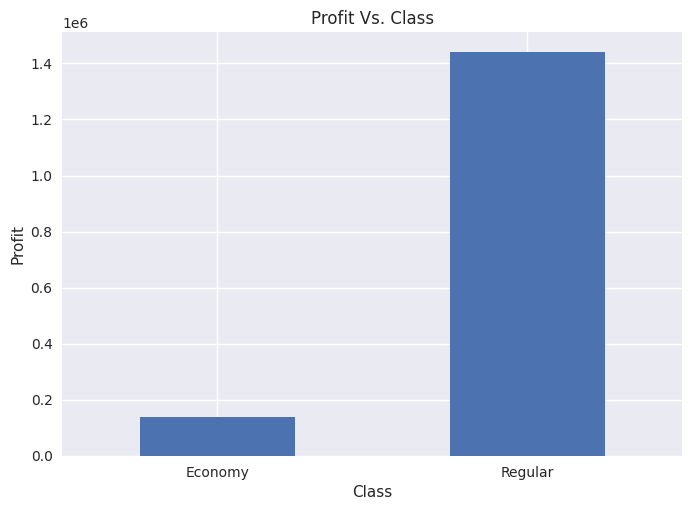

In [96]:
# What is the profit for each class in 2009?
df_2009.groupby("CLASS")["PROFIT"].sum().plot.bar(title="Profit Vs. Class")
plt.xlabel("Class")
plt.ylabel("Profit")
plt.xticks(rotation="horizontal");

In [97]:
# What the statistics of column product lead time
df.PRODUCT_LEAD_TIME.describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: PRODUCT_LEAD_TIME, dtype: float64

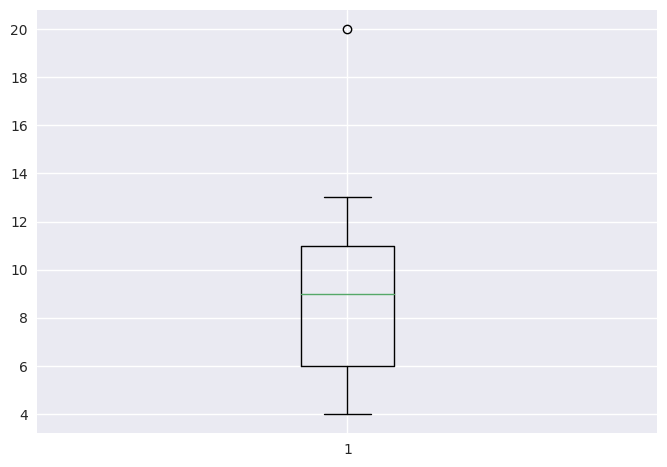

In [99]:
# Create a boxplot of the product lead time
plt.boxplot(df.PRODUCT_LEAD_TIME);

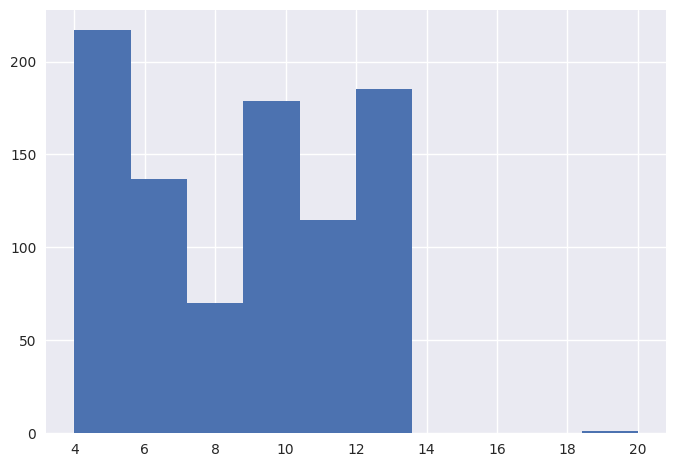

In [101]:
# Create a histogram of the product lead time
plt.hist(df.PRODUCT_LEAD_TIME);

In [104]:
# What is the minimum and maximum lead time?
print("The minimum lead time is", df.PRODUCT_LEAD_TIME.min())
print("The maximum lead time is", df.PRODUCT_LEAD_TIME.max())

The minimum lead time is 4
The maximum lead time is 20


In [105]:
# Get the row with lead time equal to 20
df[df.PRODUCT_LEAD_TIME == 20]

,SALE_DATE,SHIP_DATE,STORE_ID,PRODUCT_ID,CLIENT_ID,SALE_NUM,UNIT_COST,UNIT_PRICE,QUANTITY,DESCOUNT_VALUE,INCOME,PRODUCT,MANUFACTURER,BRAND,CLASS,COLOR,COST,PROFIT,PRODUCT_LEAD_TIME
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [108]:
# Export a dataframe to csv
df.to_csv("./datasets/new_sales_df.csv", index=False)

In [110]:
# Export a dataframe to MSExcel
df.to_excel("./datasets/new_sales_df.xlsx", index=False)